In [37]:
library(broom, warn.conflicts=FALSE)
library(dplyr, , warn.conflicts=FALSE)
library(ggplot2, warn.conflicts=FALSE)
library(grid, warn.conflicts=FALSE)
library(gridExtra, warn.conflicts=FALSE)

N = 500

data <- data_frame(
    X1 = rnorm(N, mean = 1, sd = 2),
    X2 = rnorm(N, mean = 4, sd = 3),
    X3 = rnorm(N, mean = 0, sd = 2),
    X4 = rnorm(N, mean = -1, sd = 1),
    X5 = rnorm(N, mean = 0, sd = 2),
    X6 = rnorm(N, mean = -1, sd = 2),
    X7 = rnorm(N, mean = -2, sd = 3),
    X8 = rnorm(N, mean = -3, sd = 2)
) %>%
mutate(
    Y = X1+2*X2+X3-X4+X5+5*X6+X7-3*X8 
)

data %>% head

X1,X2,X3,X4,X5,X6,X7,X8,Y
-0.9945576,5.3505600,-0.5390421,-1.1131716,-2.1865595,-0.9952466,-5.1846689,-0.674956,-0.04190163
-0.2557191,0.4694491,-1.1779913,-1.2574775,-0.2506729,1.0301435,3.3330760,-2.071378,15.20991945
4.2177240,1.5768615,2.6322380,-0.6180435,-1.8305211,-0.2480163,-1.1725400,-3.414438,16.62190059
1.7523545,6.9208990,0.2739672,-2.2137580,-2.2974052,-2.8173930,-2.1438879,-2.899930,8.25340923
1.9616687,4.7208448,0.3121167,-1.4663352,-3.0895324,-0.2347841,0.6500707,-2.157684,16.04148124
2.1168956,2.8791044,2.8927742,-1.8857475,-1.2958428,0.9240179,-1.5573124,-4.334954,27.42542403


In [39]:
mod <- lm(Y ~ X1+X2+X3+X4+X5+X6+X7+X8, data=data)
mod %>% glance
mod %>% tidy

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
1,1,1.795468e-14,3.521884e+31,0,9,15120.53,-30221.07,-30178.92,1.58284e-25,491


term,estimate,std.error,statistic,p.value
(Intercept),2.955209e-14,2.068115e-15,1.428938e+01,5.55597e-39
X1,1.000000e+00,4.015167e-16,2.490556e+15,0.00000e+00
X2,2.000000e+00,2.652875e-16,7.538991e+15,0.00000e+00
X3,1.000000e+00,4.117734e-16,2.428520e+15,0.00000e+00
X4,-1.000000e+00,8.179492e-16,-1.222570e+15,0.00000e+00
X5,1.000000e+00,4.211846e-16,2.374256e+15,0.00000e+00
X6,5.000000e+00,4.395190e-16,1.137607e+16,0.00000e+00
X7,1.000000e+00,2.741160e-16,3.648091e+15,0.00000e+00
X8,-3.000000e+00,4.099334e-16,-7.318261e+15,0.00000e+00


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.6829317,0.6816558,7.612169,535.2429,1.087604e-124,3,-1722.839,3453.678,3470.536,28798.73,497


term,estimate,std.error,statistic,p.value
(Intercept),9.383202,0.5797788,16.18411,1.253197e-47
X2,1.947941,0.1121533,17.36855,3.717674e-53
X6,5.062529,0.1844943,27.44003,1.346843e-101


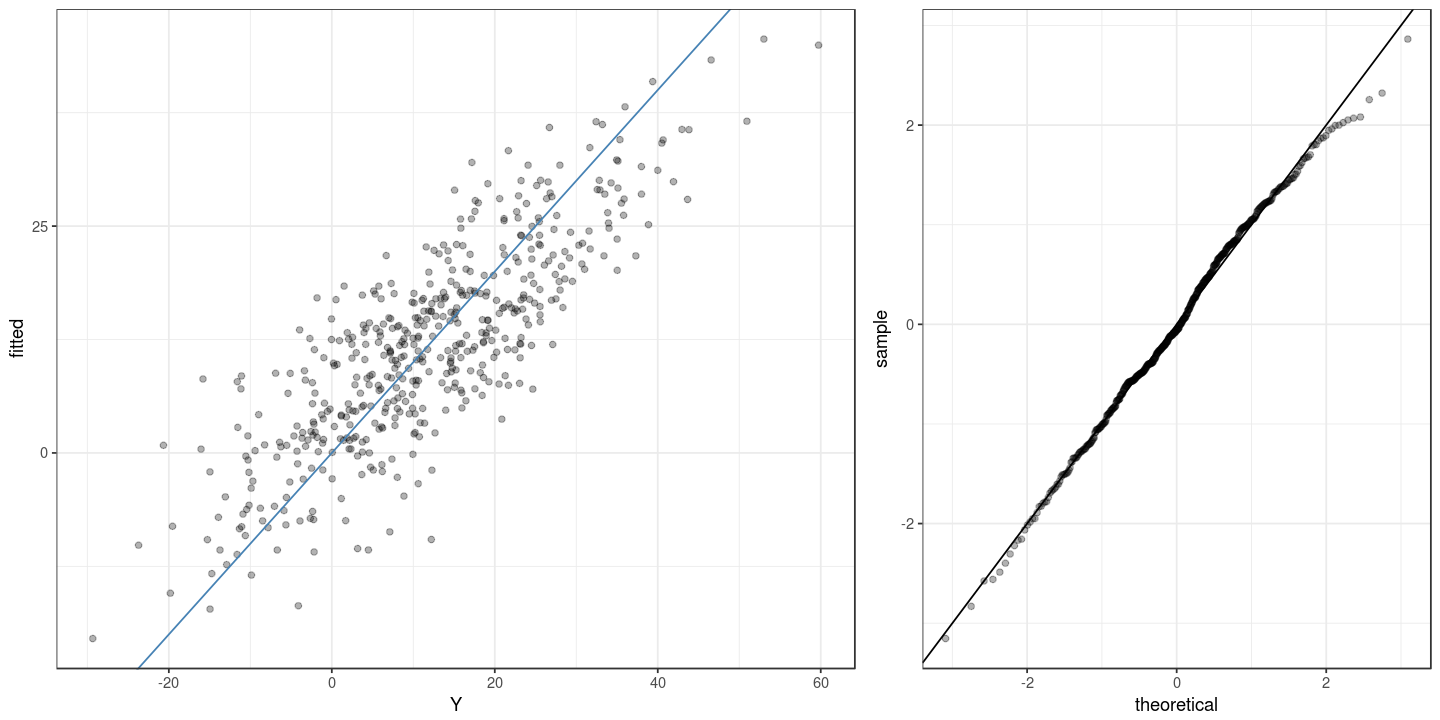

In [40]:
mod <- lm(Y ~ X2+X6, data=data)
mod %>% glance
mod %>% tidy

actual_vs_predicted <-
    mod %>%
    augment %>%
    rename(fitted=.fitted) %>%
    ggplot() +
    geom_point(aes(x=Y, y=fitted), alpha=0.3) +
    geom_abline(intercept=0, slope=1, color='steelblue') +
    theme_bw()

resid_qq <-
    mod %>%
    augment %>%
    select(resid=.resid) %>%
    mutate(
        resid_normed = (resid - mean(resid)) / sd(resid)
    ) %>%
    ggplot() +
    geom_qq(aes(sample=resid_normed), alpha=0.3) +
    geom_abline(slope=1, color="black") +
    theme_bw()

options(repr.plot.width = 12, repr.plot.height = 6)
grid.arrange(
    actual_vs_predicted, resid_qq,
    widths=c(60, 40),
    layout_matrix=rbind(
        c(1, 2)
    )
)